In [1]:
!cp /content/drive/MyDrive/data/crypto/historical_resampled/gmo/gmo_15min.zip .

In [2]:
!unzip gmo_15min.zip > /dev/null

## サンプルデータ準備

In [3]:
from glob import glob
from datetime import date, datetime, timezone, timedelta
import pandas as pd
import numpy as np
from fastprogress import progress_bar as pb
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa

In [4]:
btcjpy_files = glob('/content/15min/BTC_JPY/**/*.csv.gzip', recursive=True)

In [5]:
len(btcjpy_files)

59

In [6]:
df_btcjpy = pd.concat([pd.read_csv(f, compression='gzip') for f in pb(btcjpy_files)])

In [7]:
df_btcjpy['timestamp'] = pd.to_datetime(df_btcjpy['timestamp'], utc=True)

In [8]:
df_btcjpy_buy = df_btcjpy[df_btcjpy['side']=='BUY']
df_btcjpy_sell = df_btcjpy[df_btcjpy['side']=='SELL']
print(len(df_btcjpy_buy), len(df_btcjpy_sell))

df_btcjpy_buy.drop_duplicates('timestamp', inplace=True)
df_btcjpy_sell.drop_duplicates('timestamp', inplace=True)
print(len(df_btcjpy_buy), len(df_btcjpy_sell))

df_btcjpy_buy = df_btcjpy_buy.set_index('timestamp')
df_btcjpy_sell = df_btcjpy_sell.set_index('timestamp')

df_btcjpy_buy = df_btcjpy_buy.sort_index().resample('15T', label='right', closed='right').ffill().fillna(method='ffill')
df_btcjpy_sell = df_btcjpy_sell.sort_index().resample('15T', label='right', closed='right').ffill().fillna(method='ffill')
print(len(df_btcjpy_buy), len(df_btcjpy_sell))

170399 170400
170399 170400


<ipython-input-8-0c04ecfc9ce0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btcjpy_buy.drop_duplicates('timestamp', inplace=True)
<ipython-input-8-0c04ecfc9ce0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btcjpy_sell.drop_duplicates('timestamp', inplace=True)


170400 170400


In [9]:
df_btcjpy_buy

,size_mean,size_std,size_count,size_sum,size_ohlc_open,size_ohlc_high,size_ohlc_low,size_ohlc_close,price_mean,price_std,price_count,price_sum,price_ohlc_open,price_ohlc_high,price_ohlc_low,price_ohlc_close,side
timestamp,,,,,,,,,,,,,,,,,
2018-12-31 21:15:00+00:00,0.268333,0.259294,12,3.22,0.11,0.92,0.01,0.29,4.049046e+05,480.266301,12,4.858855e+06,404393.0,405571.0,404393.0,405571.0,BUY
2018-12-31 21:30:00+00:00,0.130000,0.259294,1,0.13,0.13,0.13,0.13,0.13,4.053070e+05,480.266301,1,4.053070e+05,405307.0,405307.0,405307.0,405307.0,BUY
2018-12-31 21:45:00+00:00,0.130000,0.259294,0,0.00,0.13,0.13,0.13,0.13,4.053070e+05,480.266301,0,0.000000e+00,405307.0,405307.0,405307.0,405307.0,BUY
2018-12-31 22:00:00+00:00,0.257037,0.265733,27,6.94,0.03,1.02,0.01,0.57,4.037711e+05,160.508017,27,1.090182e+07,404318.0,404318.0,403421.0,403841.0,BUY
2018-12-31 22:15:00+00:00,0.335833,0.501406,12,4.03,0.82,1.63,0.01,0.05,4.047461e+05,653.636465,12,4.856953e+06,403865.0,405516.0,403865.0,404003.0,BUY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-10 20:00:00+00:00,0.012778,0.011113,36,0.46,0.01,0.07,0.01,0.01,5.648172e+06,4519.415174,36,2.033342e+08,5648751.0,5655551.0,5641156.0,5642091.0,BUY
2023-11-10 20:15:00+00:00,0.019036,0.024410,249,4.74,0.01,0.29,0.01,0.01,5.638182e+06,3578.195859,249,1.403907e+09,5643177.0,5643583.0,5628227.0,5632297.0,BUY
2023-11-10 20:30:00+00:00,0.012456,0.007387,57,0.71,0.01,0.05,0.01,0.01,5.627515e+06,3014.560905,57,3.207684e+08,5630706.0,5632936.0,5620596.0,5629578.0,BUY


In [10]:
df_btcjpy_buy['size_ohlc_open_rel'] = (df_btcjpy_buy['size_ohlc_open'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']
df_btcjpy_buy['size_ohlc_high_rel'] = (df_btcjpy_buy['size_ohlc_high'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']
df_btcjpy_buy['size_ohlc_low_rel'] = (df_btcjpy_buy['size_ohlc_low'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']
df_btcjpy_buy['size_ohlc_close_rel'] = (df_btcjpy_buy['size_ohlc_close'] - df_btcjpy_buy['size_mean']) / df_btcjpy_buy['size_mean']

In [11]:
df_btcjpy_sell['size_ohlc_open_rel'] = (df_btcjpy_sell['size_ohlc_open'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']
df_btcjpy_sell['size_ohlc_high_rel'] = (df_btcjpy_sell['size_ohlc_high'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']
df_btcjpy_sell['size_ohlc_low_rel'] = (df_btcjpy_sell['size_ohlc_low'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']
df_btcjpy_sell['size_ohlc_close_rel'] = (df_btcjpy_sell['size_ohlc_close'] - df_btcjpy_sell['size_mean']) / df_btcjpy_sell['size_mean']

In [12]:
df_btcjpy_buy['price_ohlc_open_rel'] = (df_btcjpy_buy['price_ohlc_open'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']
df_btcjpy_buy['price_ohlc_high_rel'] = (df_btcjpy_buy['price_ohlc_high'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']
df_btcjpy_buy['price_ohlc_low_rel'] = (df_btcjpy_buy['price_ohlc_low'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']
df_btcjpy_buy['price_ohlc_close_rel'] = (df_btcjpy_buy['price_ohlc_close'] - df_btcjpy_buy['price_mean']) / df_btcjpy_buy['price_mean']

In [13]:
df_btcjpy_sell['price_ohlc_open_rel'] = (df_btcjpy_sell['price_ohlc_open'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']
df_btcjpy_sell['price_ohlc_high_rel'] = (df_btcjpy_sell['price_ohlc_high'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']
df_btcjpy_sell['price_ohlc_low_rel'] = (df_btcjpy_sell['price_ohlc_low'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']
df_btcjpy_sell['price_ohlc_close_rel'] = (df_btcjpy_sell['price_ohlc_close'] - df_btcjpy_sell['price_mean']) / df_btcjpy_sell['price_mean']

In [14]:
PERIODS = [
    {
        'train_start_dt': datetime(2020, 4, 23, tzinfo=timezone.utc),
        'train_end_dt': datetime(2020, 6, 23, tzinfo=timezone.utc),# - timedelta(minutes=1),
        'test_start_dt': datetime(2020, 7, 1, tzinfo=timezone.utc),
        'test_end_dt': datetime(2020, 8, 1, tzinfo=timezone.utc) - timedelta(minutes=1),
    }
]

In [15]:
def min2lag(min: int) -> int:
    assert min % 15 == 0, 'min must be multiple of 15'
    return min // 15

return(t; lag) = sell_price_open(t+lag+1) / buy_price_open(t+1) - 1  
t時点の(までの情報を用いた)予測対象リターンはt+1時点のオープンからt+1+lag時点のopenへの変化  
　->t時点の情報を見てt+1開始時にオーダーを入れる想定のため

In [16]:
RETURN_MINS = [15, 30, 45, 60, 60*6, 60*24, 60*24*7, 60*24*30]
CLASS3_PERCENTILES = [(40, 60), (30, 70)]

In [17]:
df_target = pd.DataFrame(index=df_btcjpy_sell.index)
df_target.index.name = 'timestamp'

In [18]:
for m in RETURN_MINS:
    lag = min2lag(m)
    df_target[f'return_{m}min'] = df_btcjpy_sell['price_ohlc_open'].shift(-(lag+1)) / df_btcjpy_buy['price_ohlc_open'].shift(-1) - 1

In [19]:
for m in RETURN_MINS:
    for pct_low, pct_pigh in CLASS3_PERCENTILES:
        low_th = np.percentile(df_target.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt'], f'return_{m}min'].dropna(), pct_low)
        high_th = np.percentile(df_target.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt'], f'return_{m}min'].dropna(), pct_pigh)
        df_target[f'return_{m}min_3cls_{pct_low}_{pct_pigh}'] = 1  # no change
        df_target.loc[
            df_target[f'return_{m}min'] <= low_th,
            f'return_{m}min_3cls_{pct_low}_{pct_pigh}'
        ] = 0  # down
        df_target.loc[
            df_target[f'return_{m}min'] >= high_th,
            f'return_{m}min_3cls_{pct_low}_{pct_pigh}'
        ] = 2  # up

In [20]:
df_target.columns

Index(['return_15min', 'return_30min', 'return_45min', 'return_60min',
       'return_360min', 'return_1440min', 'return_10080min', 'return_43200min',
       'return_15min_3cls_40_60', 'return_15min_3cls_30_70',
       'return_30min_3cls_40_60', 'return_30min_3cls_30_70',
       'return_45min_3cls_40_60', 'return_45min_3cls_30_70',
       'return_60min_3cls_40_60', 'return_60min_3cls_30_70',
       'return_360min_3cls_40_60', 'return_360min_3cls_30_70',
       'return_1440min_3cls_40_60', 'return_1440min_3cls_30_70',
       'return_10080min_3cls_40_60', 'return_10080min_3cls_30_70',
       'return_43200min_3cls_40_60', 'return_43200min_3cls_30_70'],
      dtype='object')

In [21]:
TARGET_COLS = df_target.filter(like='min_3cls_').columns.tolist()

In [22]:
TARGET_COLS

['return_15min_3cls_40_60',
 'return_15min_3cls_30_70',
 'return_30min_3cls_40_60',
 'return_30min_3cls_30_70',
 'return_45min_3cls_40_60',
 'return_45min_3cls_30_70',
 'return_60min_3cls_40_60',
 'return_60min_3cls_30_70',
 'return_360min_3cls_40_60',
 'return_360min_3cls_30_70',
 'return_1440min_3cls_40_60',
 'return_1440min_3cls_30_70',
 'return_10080min_3cls_40_60',
 'return_10080min_3cls_30_70',
 'return_43200min_3cls_40_60',
 'return_43200min_3cls_30_70']

In [23]:
df_target['return_1440min_3cls_40_60'].loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt']].value_counts()

2    2343
0    2343
1    1171
Name: return_1440min_3cls_40_60, dtype: int64

In [24]:
df_target['return_1440min_3cls_40_60'].loc[PERIODS[0]['test_start_dt']:PERIODS[0]['test_end_dt']].value_counts()

0    1020
2    1010
1     946
Name: return_1440min_3cls_40_60, dtype: int64

### ニュースデータ

In [25]:
df_news = pd.read_csv('/content/drive/MyDrive/data/google_news_20200301_20200822.csv', parse_dates=['published_date'])

In [26]:
df_news['published_date'] = pd.to_datetime(df_news['published_date'])
df_news['published_jst'] = pd.to_datetime(df_news['published'].map(lambda x: x.replace('+09:00', '')))

In [27]:
df_news['published_gmt'] = pd.to_datetime(df_news['published_gmt'])

In [28]:
df_news

,published,published_gmt,published_date,title,summary,topic,published_jst
0,2020-03-02 08:52:05+09:00,2020-03-01 23:52:05+00:00,2020-03-02,100倍ズームカメラスマホやパカパカスマホを触り放題。掘り出し物を探しに西海岸のサムスン体験...,100倍ズームカメラスマホやパカパカスマホを触り放題。掘り出し物を探しに西海岸のサムスン体験...,TECHNOLOGY,2020-03-02 08:52:05
1,2020-03-02 08:52:00+09:00,2020-03-01 23:52:00+00:00,2020-03-02,10～12月の全産業設備投資は3.5％減、13期ぶりマイナス - ブルームバーグ,10～12月の全産業設備投資は3.5％減、13期ぶりマイナス ブルームバーグ設備投資、約3...,BUSSINESS,2020-03-02 08:52:00
2,2020-03-02 08:52:00+09:00,2020-03-01 23:52:00+00:00,2020-03-02,10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で - ブルームバーグ,10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で ブルームバーグ日本企...,BUSSINESS,2020-03-02 08:52:00
3,2020-03-02 06:51:00+09:00,2020-03-01 21:51:00+00:00,2020-03-02,19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 ...,19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 ...,SPORTS,2020-03-02 06:51:00
4,2020-03-01 11:00:00+09:00,2020-03-01 02:00:00+00:00,2020-03-01,1位のタピオカは「ほぼ専門店」の味!? カルディで見つけた「タピオカミルクティー」飲み比べ ...,1位のタピオカは「ほぼ専門店」の味!? カルディで見つけた「タピオカミルクティー」飲み比べ ...,BUSSINESS,2020-03-01 11:00:00
...,...,...,...,...,...,...,...
42119,2020-08-22 10:33:22+09:00,2020-08-22 01:33:22+00:00,2020-08-22,コロナ終息は「2年以内」 WHOテドロス氏が言及 [新型コロナウイルス] - 朝日新聞デジタル,コロナ終息は「2年以内」 WHOテドロス氏が言及 [新型コロナウイルス] 朝日新聞デジタル...,WORLD,2020-08-22 10:33:22
42120,2020-08-22 10:33:22+09:00,2020-08-22 01:33:22+00:00,2020-08-22,コロナ終息は「2年未満で」 WHOテドロス氏が言及 [新型コロナウイルス] - 朝日新聞デジタル,コロナ終息は「2年未満で」 WHOテドロス氏が言及 [新型コロナウイルス] 朝日新聞デジタ...,WORLD,2020-08-22 10:33:22
42121,2020-08-22 12:10:00+09:00,2020-08-22 03:10:00+00:00,2020-08-22,サツキは児童虐待？「となりのトトロ」2年ぶりの地上波放送で、疑問の声噴出 - リアルライブ,サツキは児童虐待？「となりのトトロ」2年ぶりの地上波放送で、疑問の声噴出 リアルライブ,ENTERTAINMENT,2020-08-22 12:10:00
42122,2020-08-22 12:10:00+09:00,2020-08-22 03:10:00+00:00,2020-08-22,サツキは児童虐待？「となりのトトロ」放送で時流を反映した指摘 - livedoor,サツキは児童虐待？「となりのトトロ」放送で時流を反映した指摘 livedoor「となりのト...,ENTERTAINMENT,2020-08-22 12:10:00


In [29]:
df_news['published_jst_15min'] = df_news['published_jst'].dt.ceil('15T')
df_news['published_gmt_15min'] = df_news['published_gmt'].dt.ceil('15T')

In [30]:
df_news = df_news.drop_duplicates(subset='summary').reset_index(drop=True)
df_news = df_news.drop_duplicates(subset='title').reset_index(drop=True)

In [31]:
df_news

,published,published_gmt,published_date,title,summary,topic,published_jst,published_jst_15min,published_gmt_15min
0,2020-03-02 08:52:05+09:00,2020-03-01 23:52:05+00:00,2020-03-02,100倍ズームカメラスマホやパカパカスマホを触り放題。掘り出し物を探しに西海岸のサムスン体験...,100倍ズームカメラスマホやパカパカスマホを触り放題。掘り出し物を探しに西海岸のサムスン体験...,TECHNOLOGY,2020-03-02 08:52:05,2020-03-02 09:00:00,2020-03-02 00:00:00+00:00
1,2020-03-02 08:52:00+09:00,2020-03-01 23:52:00+00:00,2020-03-02,10～12月の全産業設備投資は3.5％減、13期ぶりマイナス - ブルームバーグ,10～12月の全産業設備投資は3.5％減、13期ぶりマイナス ブルームバーグ設備投資、約3...,BUSSINESS,2020-03-02 08:52:00,2020-03-02 09:00:00,2020-03-02 00:00:00+00:00
2,2020-03-02 08:52:00+09:00,2020-03-01 23:52:00+00:00,2020-03-02,10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で - ブルームバーグ,10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で ブルームバーグ日本企...,BUSSINESS,2020-03-02 08:52:00,2020-03-02 09:00:00,2020-03-02 00:00:00+00:00
3,2020-03-02 06:51:00+09:00,2020-03-01 21:51:00+00:00,2020-03-02,19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 ...,19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 ...,SPORTS,2020-03-02 06:51:00,2020-03-02 07:00:00,2020-03-01 22:00:00+00:00
4,2020-03-01 11:00:00+09:00,2020-03-01 02:00:00+00:00,2020-03-01,1位のタピオカは「ほぼ専門店」の味!? カルディで見つけた「タピオカミルクティー」飲み比べ ...,1位のタピオカは「ほぼ専門店」の味!? カルディで見つけた「タピオカミルクティー」飲み比べ ...,BUSSINESS,2020-03-01 11:00:00,2020-03-01 11:00:00,2020-03-01 02:00:00+00:00
...,...,...,...,...,...,...,...,...,...
41838,2020-08-22 10:33:22+09:00,2020-08-22 01:33:22+00:00,2020-08-22,コロナ終息は「2年以内」 WHOテドロス氏が言及 [新型コロナウイルス] - 朝日新聞デジタル,コロナ終息は「2年以内」 WHOテドロス氏が言及 [新型コロナウイルス] 朝日新聞デジタル...,WORLD,2020-08-22 10:33:22,2020-08-22 10:45:00,2020-08-22 01:45:00+00:00
41839,2020-08-22 10:33:22+09:00,2020-08-22 01:33:22+00:00,2020-08-22,コロナ終息は「2年未満で」 WHOテドロス氏が言及 [新型コロナウイルス] - 朝日新聞デジタル,コロナ終息は「2年未満で」 WHOテドロス氏が言及 [新型コロナウイルス] 朝日新聞デジタ...,WORLD,2020-08-22 10:33:22,2020-08-22 10:45:00,2020-08-22 01:45:00+00:00
41840,2020-08-22 12:10:00+09:00,2020-08-22 03:10:00+00:00,2020-08-22,サツキは児童虐待？「となりのトトロ」2年ぶりの地上波放送で、疑問の声噴出 - リアルライブ,サツキは児童虐待？「となりのトトロ」2年ぶりの地上波放送で、疑問の声噴出 リアルライブ,ENTERTAINMENT,2020-08-22 12:10:00,2020-08-22 12:15:00,2020-08-22 03:15:00+00:00
41841,2020-08-22 12:10:00+09:00,2020-08-22 03:10:00+00:00,2020-08-22,サツキは児童虐待？「となりのトトロ」放送で時流を反映した指摘 - livedoor,サツキは児童虐待？「となりのトトロ」放送で時流を反映した指摘 livedoor「となりのト...,ENTERTAINMENT,2020-08-22 12:10:00,2020-08-22 12:15:00,2020-08-22 03:15:00+00:00


In [32]:
df_news['title'][3], df_news['summary'][3]

('19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 - ゲキサカ',
 '19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還  ゲキサカレアル、2-0でクラシコ制圧！ ヴィニシウス＆マリアーノ弾炸裂…バルサから首位奪還（Football ZONE web）  Yahoo!ニュースピケ「前半は過去最悪のレアルのひとつだった」。セルヒオ・ラモスも応酬  フットボールチャンネルビニシウスとマリアーノ。期待度が正反対の2人でレアルがクラシコ勝利。（茂野聡士）  Number WebR・マドリードがバルセロナに勝利 リーグ戦での勝利は約4年ぶり  livedoorGoogle ニュースですべての記事を見る')

In [33]:
df_news['title'][2], df_news['summary'][2]

('10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で - ブルームバーグ',
 '10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で  ブルームバーグ日本企業の設備投資、10─12月期は3年ぶり前年割れ  ロイター設備投資、約3年ぶりマイナス 10～12月期3.5%減  日本経済新聞Google ニュースですべての記事を見る')

In [34]:
df_news['summary'].str.contains(' ニュースですべての記事を見る').value_counts()

True     36914
False     4929
Name: summary, dtype: int64

In [35]:
df_news.loc[:, 'summary'] = df_news.loc[:, 'summary'].map(lambda x: x.replace(' ニュースですべての記事を見る', ''))

In [36]:
df_news['title'][2], df_news['summary'][2]

('10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で - ブルームバーグ',
 '10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で  ブルームバーグ日本企業の設備投資、10─12月期は3年ぶり前年割れ  ロイター設備投資、約3年ぶりマイナス 10～12月期3.5%減  日本経済新聞Google')

In [37]:
df_news.groupby(pd.Grouper(key="published_jst_15min", freq="W")).count()

,published,published_gmt,published_date,title,summary,topic,published_jst,published_gmt_15min
published_jst_15min,,,,,,,,
2020-03-01,172,172,172,172,172,172,172,172
2020-03-08,1050,1050,1050,1050,1050,1050,1050,1050
2020-03-15,1701,1701,1701,1701,1701,1701,1701,1701
2020-03-22,1677,1677,1677,1677,1677,1677,1677,1677
2020-03-29,1780,1780,1780,1780,1780,1780,1780,1780
2020-04-05,1735,1735,1735,1735,1735,1735,1735,1735
2020-04-12,1786,1786,1786,1786,1786,1786,1786,1786
2020-04-19,1724,1724,1724,1724,1724,1724,1724,1724
2020-04-26,1745,1745,1745,1745,1745,1745,1745,1745


In [39]:
np.load(f'/content/drive/MyDrive/gnews_openai_ada2_emb_tmp.npy').shape

(41843, 1536)

In [40]:
df_news = pd.concat(
    [
        df_news,
        pd.DataFrame(
            np.load(f'/content/drive/MyDrive/gnews_openai_ada2_emb_tmp.npy'),
            columns=[f'openai_emb_{i}' for i in range(1536)],
            index=df_news.index
        )
    ],
    axis=1
)

In [41]:
df_news

,published,published_gmt,published_date,title,summary,topic,published_jst,published_jst_15min,published_gmt_15min,openai_emb_0,...,openai_emb_1526,openai_emb_1527,openai_emb_1528,openai_emb_1529,openai_emb_1530,openai_emb_1531,openai_emb_1532,openai_emb_1533,openai_emb_1534,openai_emb_1535
0,2020-03-02 08:52:05+09:00,2020-03-01 23:52:05+00:00,2020-03-02,100倍ズームカメラスマホやパカパカスマホを触り放題。掘り出し物を探しに西海岸のサムスン体験...,100倍ズームカメラスマホやパカパカスマホを触り放題。掘り出し物を探しに西海岸のサムスン体験...,TECHNOLOGY,2020-03-02 08:52:05,2020-03-02 09:00:00,2020-03-02 00:00:00+00:00,-0.004255,...,0.000178,0.008882,0.033295,-0.021378,-0.004851,0.004386,0.007344,-0.006245,-0.006213,0.005176
1,2020-03-02 08:52:00+09:00,2020-03-01 23:52:00+00:00,2020-03-02,10～12月の全産業設備投資は3.5％減、13期ぶりマイナス - ブルームバーグ,10～12月の全産業設備投資は3.5％減、13期ぶりマイナス ブルームバーグ設備投資、約3...,BUSSINESS,2020-03-02 08:52:00,2020-03-02 09:00:00,2020-03-02 00:00:00+00:00,-0.030484,...,-0.008493,-0.002103,0.033757,-0.024006,-0.016905,-0.007459,-0.012192,-0.001834,0.003204,0.015296
2,2020-03-02 08:52:00+09:00,2020-03-01 23:52:00+00:00,2020-03-02,10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で - ブルームバーグ,10～12月全産業設備投資､13期ぶりマイナス-世界経済減速や台風で ブルームバーグ日本企...,BUSSINESS,2020-03-02 08:52:00,2020-03-02 09:00:00,2020-03-02 00:00:00+00:00,-0.033296,...,-0.002824,-0.013333,0.023963,-0.014671,-0.020776,-0.006509,-0.016675,-0.002157,0.007416,0.002787
3,2020-03-02 06:51:00+09:00,2020-03-01 21:51:00+00:00,2020-03-02,19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 ...,19歳FWビニシウスが“メッシ超え”決勝弾!! R・マドリー、天王山クラシコ制して首位奪還 ...,SPORTS,2020-03-02 06:51:00,2020-03-02 07:00:00,2020-03-01 22:00:00+00:00,-0.020720,...,0.008584,-0.000512,0.023396,-0.042528,-0.032383,0.018143,-0.006023,-0.018393,-0.013502,-0.022406
4,2020-03-01 11:00:00+09:00,2020-03-01 02:00:00+00:00,2020-03-01,1位のタピオカは「ほぼ専門店」の味!? カルディで見つけた「タピオカミルクティー」飲み比べ ...,1位のタピオカは「ほぼ専門店」の味!? カルディで見つけた「タピオカミルクティー」飲み比べ ...,BUSSINESS,2020-03-01 11:00:00,2020-03-01 11:00:00,2020-03-01 02:00:00+00:00,-0.002138,...,0.011098,0.004742,0.038871,-0.049337,-0.012272,0.008852,-0.020314,0.002581,-0.018350,-0.035162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41838,2020-08-22 10:33:22+09:00,2020-08-22 01:33:22+00:00,2020-08-22,コロナ終息は「2年以内」 WHOテドロス氏が言及 [新型コロナウイルス] - 朝日新聞デジタル,コロナ終息は「2年以内」 WHOテドロス氏が言及 [新型コロナウイルス] 朝日新聞デジタル...,WORLD,2020-08-22 10:33:22,2020-08-22 10:45:00,2020-08-22 01:45:00+00:00,-0.020646,...,0.010971,-0.010562,0.018258,-0.039899,-0.014628,-0.005366,-0.018435,-0.001376,-0.004714,-0.004438
41839,2020-08-22 10:33:22+09:00,2020-08-22 01:33:22+00:00,2020-08-22,コロナ終息は「2年未満で」 WHOテドロス氏が言及 [新型コロナウイルス] - 朝日新聞デジタル,コロナ終息は「2年未満で」 WHOテドロス氏が言及 [新型コロナウイルス] 朝日新聞デジタ...,WORLD,2020-08-22 10:33:22,2020-08-22 10:45:00,2020-08-22 01:45:00+00:00,-0.021871,...,0.009883,-0.008932,0.020159,-0.036623,-0.015459,-0.003902,-0.018760,0.003671,0.000369,-0.004435
41840,2020-08-22 12:10:00+09:00,2020-08-22 03:10:00+00:00,2020-08-22,サツキは児童虐待？「となりのトトロ」2年ぶりの地上波放送で、疑問の声噴出 - リアルライブ,サツキは児童虐待？「となりのトトロ」2年ぶりの地上波放送で、疑問の声噴出 リアルライブ,ENTERTAINMENT,2020-08-22 12:10:00,2020-08-22 12:15:00,2020-08-22 03:15:00+00:00,0.000102,...,0.008492,0.019871,0.018272,-0.029929,0.000525,0.012301,0.003443,-0.003280,-0.006723,0.002924
41841,2020-08-22 12:10:00+09:00,2020-08-22 03:10:00+00:00,2020-08-22,サツキは児童虐待？「となりのトトロ」放送で時流を反映した指摘 - livedoor,サツキは児童虐待？「となりのトトロ」放送で時流を反映した指摘 livedoor「となりのト...,ENTERTAINMENT,2020-08-22 12:10:00,2020-08-22 12:15:00,2020-08-22 03:15:00+00:00,-0.012316,...,0.005846,0.017548,0.013775,-0.028636,-0.002562,0.008245,-0.007078,0.000621,-0.018579,-0.002711


In [42]:
FEAT_COLS = df_news.filter(like='openai_emb_').columns.tolist()

In [43]:
len(FEAT_COLS)

1536

In [44]:
df_news = df_news.dropna(subset=FEAT_COLS + ['title', 'summary'])

In [45]:
len(df_news)

41843

In [46]:
df_news['topic'].value_counts()

ENTERTAINMENT    9690
TECHNOLOGY       9183
BUSSINESS        8016
SPORTS           7237
NATION           3628
WORLD            3420
POLICTICS         669
Name: topic, dtype: int64

In [47]:
df_news = df_news[df_news['topic'].isin(['BUSSINESS', 'WORLD', 'POLICTICS'])]

In [48]:
len(df_news)

12105

In [49]:
df_news = df_news.set_index('published_gmt_15min')

In [50]:
df_news.join(df_btcjpy_buy.add_prefix('buy_')).filter(like='_buy').isnull().any().any()

False

In [51]:
df_news_btcjpy = df_news.join(df_target)
assert len(df_news_btcjpy) == len(df_news)
assert df_news_btcjpy.filter(like='return_').isnull().any().any() == False

df_news_btcjpy = df_news_btcjpy.join(df_btcjpy_buy.add_prefix('buy_'))
assert len(df_news_btcjpy) == len(df_news)
assert df_news_btcjpy.filter(like='_buy').isnull().any().any() == False

df_news_btcjpy = df_news_btcjpy.join(df_btcjpy_buy.add_prefix('sell_'))
assert len(df_news_btcjpy) == len(df_news)
assert df_news_btcjpy.filter(like='_sell').isnull().any().any() == False

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
df_feat_train = df_news_btcjpy.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt'], FEAT_COLS]
df_target_train = df_news_btcjpy.loc[PERIODS[0]['train_start_dt']:PERIODS[0]['train_end_dt'], df_target.columns]
df_feat_test = df_news_btcjpy.loc[PERIODS[0]['test_start_dt']:PERIODS[0]['test_end_dt'], FEAT_COLS]
df_target_test = df_news_btcjpy.loc[PERIODS[0]['test_start_dt']:PERIODS[0]['test_end_dt'], df_target.columns]

In [54]:
x_ss = StandardScaler().fit(df_feat_train)

In [55]:
df_feat_train = pd.DataFrame(
    data=x_ss.transform(df_feat_train),
    index=df_feat_train.index,
    columns=df_feat_train.columns
)
df_feat_test = pd.DataFrame(
    data=x_ss.transform(df_feat_test),
    index=df_feat_test.index,
    columns=df_feat_test.columns
)

In [56]:
df_feat_train.std()

openai_emb_0       1.000125
openai_emb_1       1.000125
openai_emb_2       1.000125
openai_emb_3       1.000125
openai_emb_4       1.000125
                     ...   
openai_emb_1531    1.000125
openai_emb_1532    1.000125
openai_emb_1533    1.000125
openai_emb_1534    1.000125
openai_emb_1535    1.000125
Length: 1536, dtype: float64

In [57]:
df_feat_train.mean()

openai_emb_0       6.369407e-17
openai_emb_1       1.061568e-17
openai_emb_2       1.769280e-18
openai_emb_3       7.077119e-17
openai_emb_4       0.000000e+00
                       ...     
openai_emb_1531   -7.784831e-17
openai_emb_1532   -7.209815e-17
openai_emb_1533    2.830848e-17
openai_emb_1534   -1.061568e-17
openai_emb_1535   -3.450095e-17
Length: 1536, dtype: float64

In [58]:
df_feat_test.std()

openai_emb_0       0.962754
openai_emb_1       0.993410
openai_emb_2       1.015708
openai_emb_3       1.034771
openai_emb_4       1.022313
                     ...   
openai_emb_1531    1.006252
openai_emb_1532    0.994075
openai_emb_1533    0.991203
openai_emb_1534    1.001791
openai_emb_1535    1.046293
Length: 1536, dtype: float64

In [59]:
df_feat_test.mean()

openai_emb_0       0.142738
openai_emb_1       0.054543
openai_emb_2      -0.037646
openai_emb_3       0.053980
openai_emb_4      -0.104434
                     ...   
openai_emb_1531    0.099804
openai_emb_1532    0.053656
openai_emb_1533    0.018350
openai_emb_1534    0.120063
openai_emb_1535   -0.083639
Length: 1536, dtype: float64

## PPO

In [60]:
import collections
from typing import Union
import math
import random
from copy import deepcopy
from typing import Optional

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from fastprogress import progress_bar as pb
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
class ExpBuffer:

    def __init__(
        self,
        max_size: int = 20000,
        prob_alpha: float = 0.6,
        beta_start: float = 0.4,
        beta_frames: float = 100000,
        n_step: int = 4,
        gamma: float = 0.99,
    ):
        self._prob_alpha = prob_alpha
        self._max_size = max_size
        self._buf = []
        self._pos = 0
        self._beta_start = beta_start
        self._beta = beta_start
        self._beta_frames = beta_frames
        self._n_step = n_step
        self._gamma = gamma
        self._total_discounted_rewards = np.array([np.nan]*max_size)
        self._last_states = [np.nan]*max_size

    def update_bata(self, idx) -> None:
        beta = self._beta_start + idx * (1.0 - self._beta_start) / self._beta_frames
        self._beta = min(1.0, beta)
        return self._beta

    def __len__(self):
        return len(self._buf)

    def append(
        self,
        state: np.ndarray,
        action: int,
        reward: Union[int, float],
        done: bool,
        next_state: np.ndarray,
    ) -> None:
        if len(self._buf) < self._max_size:
            self._buf.append(
                (state, action, reward, done, next_state)
            )
        else:
            self._buf[self._pos] = (state, action, reward, done, next_state)

        if len(self._buf) >= self._n_step:
            dis_r = 0.0
            last_state = self._buf[self._pos][0]
            for i in range(self._n_step):
                state, _, r, done, _ = self._buf[self._pos - i]
                dis_r = r + self._gamma * dis_r
                if done:
                    last_state = state
                    dis_r = r  # ※
                self._total_discounted_rewards[self._pos - i] = dis_r
                self._last_states[self._pos - i] = last_state

            for i in range(self._n_step-1):
                done = self._buf[self._pos - i][3]
                if done:
                    break
                self._total_discounted_rewards[self._pos - i] = np.nan
                self._last_states[self._pos - i] = np.nan

        self._pos = (self._pos + 1) % self._max_size

    def get_latest_n(self, n: int):
        if len(self._buf) < self._max_size:
            if len(self._buf) < n+self._n_step:
                raise RuntimeError('get_latest_n : len(self._buf) < n+self._n_step')
            s_idx = self._pos - self._n_step - n
            e_idx = self._pos - self._n_step
            latest_exps = self._buf[s_idx:e_idx]
            latest_total_rewards = self._total_discounted_rewards[s_idx:e_idx]
            latest_last_states = self._last_states[s_idx:e_idx]
        else:
            s_idx = self._pos + self._max_size - self._n_step - n
            e_idx = self._pos + self._max_size - self._n_step
            latest_exps = (self._buf*2)[s_idx:e_idx]
            latest_total_rewards = np.concatenate([self._total_discounted_rewards]*2)[s_idx:e_idx]
            latest_last_states = (self._last_states*2)[s_idx:e_idx]
        if len(latest_total_rewards) != n:
            print(f'{s_idx} : {e_idx} : {e_idx-s_idx} : {len((self._total_discounted_rewards*2))}')
        assert len(latest_exps) == n
        assert len(latest_total_rewards) == n
        assert len(latest_last_states) == n
        states, actions, rewards, dones, next_states = zip(*latest_exps)
        states = np.array(states)
        actions = np.array(actions)
        rewards = np.array(rewards)
        dones = np.array(dones)
        next_states = np.array(next_states)
        last_states = np.stack(latest_last_states)
        return states, actions, rewards, dones, latest_total_rewards, last_states

    def update_priorities(self, sample_indices: np.ndarray, sample_priorities: np.ndarray) -> None:
        self._priorities[sample_indices] = sample_priorities

    @property
    def gamma(self) -> float:
        return self._gamma

    @property
    def n_step(self) -> float:
        return self._n_step

In [62]:
class ModelActor(nn.Module):
    def __init__(self, obs_size, act_size, hidden_size = 64, bias=True):
        super(ModelActor, self).__init__()

        self.mu = nn.Sequential(
            nn.Linear(obs_size, hidden_size, bias=bias),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=bias),
            nn.Tanh(),
            nn.Linear(hidden_size, act_size, bias=bias),
            nn.Softmax(-1),
        )
        self.logstd = nn.Parameter(torch.zeros(act_size))

    def forward(self, x):
        return self.mu(x)

class ModelCritic(nn.Module):
    def __init__(self, obs_size, hidden_size = 64):
        super(ModelCritic, self).__init__()

        self.value = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
        )

    def forward(self, x):
        return self.value(x)

In [63]:
def calc_adv_ref(rewards, dones, net_crt, states_v, gamma, gae_lambda, batch_size, device="cpu"):
    # values_v = net_crt(states_v)
    values_v = torch.cat([net_crt(states_v[batch_ofs:batch_ofs+batch_size]) for batch_ofs in range(0, states_v.shape[0], batch_size)], 0)
    values = values_v.squeeze().data.cpu().numpy()

    last_gae = 0.0
    result_adv = []
    result_ref = []
    for val, next_val, reward, done in zip(reversed(values[:-1]),
                                     reversed(values[1:]),
                                     reversed(rewards[:-1]),
                                     reversed(dones[:-1])):
        if done:
            delta = reward - val
            last_gae = delta
        else:
            delta = reward + gamma * next_val - val
            last_gae = delta + gamma * gae_lambda * last_gae
        result_adv.append(last_gae)
        result_ref.append(last_gae + val)

    adv_v = torch.FloatTensor(list(reversed(result_adv)))
    ref_v = torch.FloatTensor(list(reversed(result_ref)))
    return adv_v.to(device), ref_v.to(device)


def calc_logprob(mu_v, logstd_v, actions_v):
    p1 = - ((mu_v - actions_v) ** 2) / (2*torch.exp(logstd_v).clamp(min=1e-3))
    p2 = - torch.log(torch.sqrt(2 * math.pi * torch.exp(logstd_v)))
    return p1 + p2

In [64]:
class Agent:

    def __init__(
        self,
        env,
        exp_buffer: ExpBuffer,
        act_net: nn.Module,
        crt_net: nn.Module,
        epsilon_start: float = 1.0,
        epsilon_final: float = 0.01,
        epsilon_decay_last_step: int = 200000,
        act_learning_rate: float = 1e-5,
        crt_learning_rate: float = 1e-4,
        adam_eps: float = None,
        device: str = 'cuda' if torch.cuda.is_available() else 'cpu',
        trajectory_size: int = 2049,
        ppo_eps: float = 0.2,
        gae_lambda: float = 0.95,
    ):
        self._env = env
        self._exp_buffer = exp_buffer
        self._act_net = act_net
        self._crt_net = crt_net
        self._epsilon_start = epsilon_start
        self._epsilon_final = epsilon_final
        self._epsilon_decay_last_step = epsilon_decay_last_step
        self._epsilon = epsilon_start
        self._device = device
        self._total_step = 0
        self._total_trained_samples = 0
        # self._tgt_sync_steps = tgt_sync_steps
        adam_kwargs = {}
        if adam_eps is not None:
            adam_kwargs['eps'] = adam_eps
        self._act_optimizer = torch.optim.Adam(self._act_net.parameters(), lr=act_learning_rate, **adam_kwargs)
        self._crt_optimizer = torch.optim.Adam(self._crt_net.parameters(), lr=crt_learning_rate, **adam_kwargs)
        self._reset_episode()
        # self._use_sync_net = use_sync_net
        self._episode = 0
        self._trajectory_size = trajectory_size
        self._ppo_eps = ppo_eps
        self._gae_lambda = gae_lambda
        self._episode_rewards = []
        self._episode_test_rewards = []

    def _reset_episode(self):
        self._state, self._df_reward_tmp = self._env.reset()
        self._total_reward = 0.0

    @torch.no_grad()
    def play_step(self, epsilon: Optional[float] = None, sync_target: bool = True):
        if epsilon is None:
            epsilon = self._epsilon
        done_reward = None

        if np.random.random() < epsilon:
            action = self._env.action_space.sample()
        else:
            # state_a = np.array([self._state], copy=False)
            state_a = self._state.to_numpy()
            state_v = torch.tensor(state_a).float().to(self._device)
            prob_v = self._act_net(state_v)
#             action = prob_v.squeeze(dim=0).argmax().data.cpu().numpy()
            prob = prob_v.squeeze(dim=0).data.cpu().numpy()
            action = np.random.choice(range(len(prob)), size=1, p=prob).astype(int)[0]
#             print(action)
#             action = np.clip(action, -1, 1)

        next_state, reward, is_done, info = self._env.step(action, self._state, self._df_reward_tmp)
        self._total_reward += reward

        self._exp_buffer.append(
            np.squeeze(self._state.to_numpy()), action, reward, is_done, np.squeeze(next_state.to_numpy())
        )
        self._state = next_state
        self._df_reward_tmp = info['df_next_rewards']
        if is_done:
            done_reward = self._total_reward
            self._reset_episode()

        self._total_step += 1
        self._update_epsilon(self._total_step)
        self._exp_buffer.update_bata(self._total_step)

        # if self._total_step % self._tgt_sync_steps == 0 and sync_target:
        #     self._tgt_net.load_state_dict(self._net.state_dict())
        #     print(f'synced target net')

        return done_reward

    def train(self, ppo_epoch: int = 10, batch_size: int = 32) -> None:
        n_step_gamma = self._exp_buffer.gamma ** self._exp_buffer.n_step

        for stp in range(self._trajectory_size):
            done_reward = self.play_step()
            if done_reward is not None:
                print(f'episode : {self._episode}, done reward : {done_reward}, total_step : {self._total_step}, cur_epsilon : {self._epsilon}')
                self._episode += 1
                self._episode_rewards.append(done_reward)
        traj_states, traj_actions, traj_rewards, traj_dones, traj_total_discounted_rewards, \
            traj_last_states = self._exp_buffer.get_latest_n(self._trajectory_size)
        traj_states_v = torch.tensor(traj_states).float().to(self._device)
        traj_actions_v = torch.tensor(traj_actions).to(self._device)
        traj_discounted_rewards_v = torch.tensor(traj_total_discounted_rewards).to(self._device)
        traj_done_mask = torch.BoolTensor(traj_dones).to(self._device)
        # weights_v = torch.tensor(weights).to(self._device)

        with torch.no_grad():
            traj_adv_v, traj_ref_v = calc_adv_ref(
                traj_total_discounted_rewards, traj_dones, self._crt_net, traj_states_v,
                gamma=n_step_gamma, gae_lambda=self._gae_lambda, batch_size=batch_size, device=self._device  # reards or total_discounted_rewards ?
            )
            traj_prob_v = torch.cat([self._act_net(traj_states_v[batch_ofs:batch_ofs+batch_size]) for batch_ofs in range(0, traj_states_v.shape[0], batch_size)], 0)
    #         old_logprob_v = calc_logprob(mu_v, self._act_net.logstd, traj_actions_v)
    #         action_prob_v = prob_v.max(1)[0]
            traj_action_prob_v = traj_prob_v.gather(1, traj_actions_v.unsqueeze(-1))
            old_logprob_v = torch.log(traj_action_prob_v)

            # normalize advantages
            traj_adv_v = traj_adv_v - torch.mean(traj_adv_v)
            traj_adv_v /= torch.std(traj_adv_v)

            # drop last entry from the trajectory, an our adv and ref value calculated without it
            # trajectory = trajectory[:-1]
            old_logprob_v = old_logprob_v[:-1].detach()

        sum_loss_value = 0.0
        sum_loss_policy = 0.0
        count_steps = 0

        self._crt_net.train()
        self._act_net.train()

        for epoch in range(ppo_epoch):
            for batch_ofs in range(0, self._trajectory_size-1, batch_size):
                batch_l = batch_ofs + batch_size
                states_v = traj_states_v[batch_ofs:batch_l]
                actions_v = traj_actions_v[batch_ofs:batch_l]
                batch_adv_v = traj_adv_v[batch_ofs:batch_l]
                batch_adv_v = batch_adv_v.unsqueeze(-1)
                batch_ref_v = traj_ref_v[batch_ofs:batch_l]
                batch_old_logprob_v = old_logprob_v[batch_ofs:batch_l]

                # critic training
                self._crt_optimizer.zero_grad()
                value_v = self._crt_net(states_v)
                loss_value_v = F.mse_loss(value_v.squeeze(-1), batch_ref_v)
                loss_value_v.backward()
                self._crt_optimizer.step()

                # actor training
                self._act_optimizer.zero_grad()
                prob_v = self._act_net(states_v)  # 変更要
#                 action_prob_v = prob_v.max(1)[0]
                action_prob_v = prob_v.gather(1, actions_v.unsqueeze(-1))
#                 logprob_pi_v = calc_logprob(mu_v, self._act_net.logstd, actions_v)
                logprob_pi_v = torch.log(action_prob_v)
                ratio_v = torch.exp(logprob_pi_v - batch_old_logprob_v)
                surr_obj_v = batch_adv_v * ratio_v
                c_ratio_v = torch.clamp(ratio_v, 1.0 - self._ppo_eps, 1.0 + self._ppo_eps)
                clipped_surr_v = batch_adv_v * c_ratio_v
                loss_policy_v = -torch.min(surr_obj_v, clipped_surr_v).mean()
                loss_policy_v.backward()
                self._act_optimizer.step()

                sum_loss_value += loss_value_v.item()
                sum_loss_policy += loss_policy_v.item()
                count_steps += 1

        # self._exp_buffer.update_priorities(sampled_indices, prios)
        self._total_trained_samples += batch_size

    def initial_exploration(self, n_steps: int = 10000, epsilon: float = 1.0) -> None:
        eps_bak = self._epsilon
        total_step_bak = self._total_step
        for i in pb(range(n_steps)):
            self._epsilon = epsilon
            self.play_step(sync_target=False)
        self._total_step = total_step_bak
        self._epsilon = eps_bak

    def simulate_episode(self) -> float:
        eps_bak = self._epsilon
        total_step_bak = self._total_step
        while True:
            self._epsilon = 0.0
            done_reward = self.play_step(sync_target=False)
            if done_reward is not None:
                break
        self._total_step = total_step_bak
        self._epsilon = eps_bak
        return done_reward

    def _update_epsilon(self, step_index: int) -> None:
        self._epsilon = max(
            self._epsilon_final,
            self._epsilon_start - step_index / self._epsilon_decay_last_step
        )

## env

In [65]:
import random
from typing import List, Tuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
class ActionSpace:

    def __init__(self, actions: List[str]):
        self._actions = actions

    def sample(self):
        return random.choice(range(len(self._actions)))

    @property
    def actions(self) -> List[str]:
        return self._actions

In [67]:
class MarketEnvMultiState:
    """datetimeインデックス↔状態が1対多の場合もあり"""

    def __init__(
        self,
        action_space: ActionSpace,
        df_states_ts: pd.DataFrame,
        df_rewards_ts: pd.DataFrame,
        state_seq_len: int = 1,
        start_dt: pd.Timestamp = None,
        end_dt: pd.Timestamp = None,
        on_episode_end = None,
    ):
        self.action_space = action_space
        self._episode = 0
        self._df_states = df_states_ts
        self._df_rewards = df_rewards_ts
        self._dt_idx_unq = df_states_ts.index.unique()
        self._state_seq_len = state_seq_len
        assert all([action in df_rewards_ts.columns for action in action_space.actions])
        assert (df_states_ts.index == df_rewards_ts.index).all()
        self._df_states_rewards = pd.concat([df_states_ts, df_rewards_ts], axis=1)
        self._states_cols = df_states_ts.columns.tolist()
        self._rewards_cols = df_rewards_ts.columns.tolist()
        self._cur_idx = self._state_seq_len
        if start_dt is not None:
            self._start_dt_idx = df_states_ts.index[df_states_ts.index >= start_dt].min()
        else:
            self._start_dt_idx = None
        if end_dt is not None:
            self._end_dt_idx = df_states_ts.index[df_states_ts.index <= end_dt].max()
        else:
            self._end_dt_idx = None
        self._on_episode_end = on_episode_end

    def reset(self):
        if self._start_dt_idx is None:
            self._cur_idx = self._state_seq_len
        else:
            self._cur_idx = self._dt_index2idx(self._start_dt_idx) + self._state_seq_len
        dt_indices = self._dt_idx_unq[self._cur_idx - self._state_seq_len:self._cur_idx]
        df_states, df_rewards = self._sample_n_per_dt_idx(dt_indices, n=1)
        return df_states, df_rewards

    def step(self, action: int, df_cur_states: pd.DataFrame, df_cur_rewards: pd.DataFrame):
        info = None
        cur_state_dt_indices = self._dt_idx_unq[self._cur_idx - self._state_seq_len:self._cur_idx]
        next_state_dt_indices = self._dt_idx_unq[self._cur_idx - self._state_seq_len + 1:self._cur_idx + 1]
        df_next_states, df_next_rewards = self._sample_n_per_dt_idx(next_state_dt_indices, n=1)
        if self._state_seq_len > 1:
            df_next_states = pd.concat([df_cur_states.iloc[:-1], df_next_states.iloc[-1:]])
            df_next_rewards = pd.concat([df_next_rewards.iloc[:-1], df_next_rewards.iloc[-1:]])
        reward = df_cur_rewards.iloc[-1][self.action_space.actions[action]]
        info = {'df_next_rewards': df_next_rewards}
        if self._end_dt_idx is None:
            is_done = self._cur_idx == len(self._dt_idx_unq) - 1
        else:
            is_done = self._dt_idx_unq[self._cur_idx] >= self._end_dt_idx
        if is_done and self._on_episode_end is not None:
            self._on_episode_end(self, reward)
        self._cur_idx += 1
        return df_next_states, reward, is_done, info

    def _index2dt_idx(self, idx: int) -> pd.Timestamp:
        return self._df_states.index[idx]

    def _dt_index2idx(self, dt_idx: pd.Timestamp) -> int:
        return self._dt_idx_unq.get_loc(dt_idx)

    def _sample_n_per_dt_idx(self, dt_indices, n: int = 1) -> Tuple[pd.DataFrame, pd.DataFrame]:
        min_dt = dt_indices.min()
        max_dt = dt_indices.max()
        df_state_reward_in_periods = self._df_states_rewards.loc[min_dt:max_dt]
        df_state_reward = df_state_reward_in_periods.groupby(level=0, group_keys=False).apply(lambda df: df.sample(n))
        return df_state_reward[self._states_cols], df_state_reward[self._rewards_cols]

In [68]:
TARGET = 'return_1440min'

In [69]:
ACTIONS = [
    'do_nothing',
    'buy',
    'sell',
]
N_ACTIONS = len(ACTIONS)

In [70]:
len(df_feat_train), len(df_target_train)

(4016, 4016)

In [71]:
env = MarketEnvMultiState(
    action_space=ActionSpace(actions=ACTIONS),
    df_states_ts=df_feat_train,
    df_rewards_ts=pd.DataFrame(
        data={
            'do_nothing': np.zeros(len(df_target_train)),
            'buy': df_target_train[TARGET],
            'sell': -df_target_train[TARGET]
        },
        index=df_feat_train.index
    ),
    state_seq_len=1,
)

## train

### exp1

In [129]:
state, reward = env.reset()

In [130]:
state

,openai_emb_0,openai_emb_1,openai_emb_2,openai_emb_3,openai_emb_4,openai_emb_5,openai_emb_6,openai_emb_7,openai_emb_8,openai_emb_9,...,openai_emb_1526,openai_emb_1527,openai_emb_1528,openai_emb_1529,openai_emb_1530,openai_emb_1531,openai_emb_1532,openai_emb_1533,openai_emb_1534,openai_emb_1535
2020-04-23 00:30:00+00:00,-0.016345,0.000372,-0.010876,-0.01751,0.019516,0.00237,-0.014461,-0.010375,-0.009534,0.000958,...,0.00822,-0.007861,0.032662,-0.03044,-0.037894,-0.002631,-0.023257,-0.009385,-0.005845,-0.006017


In [131]:
state.to_numpy().shape

(1, 1536)

In [132]:
reward

,do_nothing,buy,sell
2020-04-23 00:30:00+00:00,0.0,0.053175,-0.053175


In [133]:
device = 'cpu'

In [134]:
OBS_DIM = state.to_numpy().shape[-1]

In [135]:
OBS_DIM

1536

In [136]:
len(FEAT_COLS)

1536

In [137]:
act_net = ModelActor(OBS_DIM, N_ACTIONS).to(device)
crt_net = ModelCritic(OBS_DIM).to(device)

In [138]:
exp_buffer = ExpBuffer(
    # max_size=20000,
    max_size=2500,
    prob_alpha=0.6,
    beta_start=0.4,
    beta_frames=30000, #100000,
    n_step=1,
    gamma=0.99,
)

In [139]:
agent = Agent(
    env=env,
    exp_buffer=exp_buffer,
    crt_net=crt_net,
    act_net=act_net,
    epsilon_start=0.6,
    epsilon_final=0.002,
    epsilon_decay_last_step=1000000, #200000,
    # tgt_sync_steps=1000,
    act_learning_rate=1e-5,
    crt_learning_rate=1e-4,
    device=device,
    trajectory_size=2049,
    ppo_eps=0.2,
    gae_lambda=0.95,
)

In [140]:
agent.initial_exploration(n_steps=100)

In [141]:
states, actions, rewards, dones, next_states = zip(*agent._exp_buffer._buf)

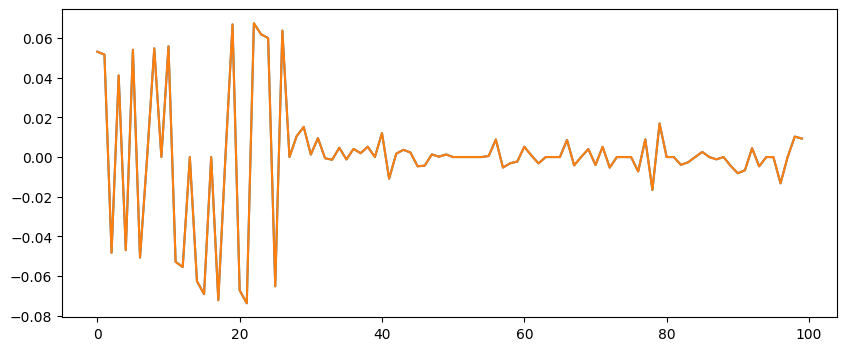

In [142]:
plt.figure(figsize=(10, 4))
plt.plot(rewards[:200])
plt.plot(agent._exp_buffer._total_discounted_rewards[:200])

In [143]:
episode = 0

while True:
    agent.train(ppo_epoch=4, batch_size=16)

episode : 0, done reward : -1.6996108101894083, total_step : 2397, cur_epsilon : 0.597603
episode : 1, done reward : -0.22072821475223825, total_step : 4894, cur_epsilon : 0.595106
episode : 2, done reward : -0.30440724710738776, total_step : 7391, cur_epsilon : 0.5926089999999999
episode : 3, done reward : -0.8583198383256064, total_step : 9888, cur_epsilon : 0.590112
episode : 4, done reward : -2.520956912869553, total_step : 12385, cur_epsilon : 0.587615
episode : 5, done reward : 0.27189103599681774, total_step : 14882, cur_epsilon : 0.585118
episode : 6, done reward : 0.8157835503174897, total_step : 17379, cur_epsilon : 0.5826209999999999
episode : 7, done reward : -0.09305031864120228, total_step : 19876, cur_epsilon : 0.580124
episode : 8, done reward : 0.7270227220879406, total_step : 22373, cur_epsilon : 0.577627
episode : 9, done reward : 3.89625882463876, total_step : 24870, cur_epsilon : 0.57513
episode : 10, done reward : 1.173829011690397, total_step : 27367, cur_epsilon

KeyboardInterrupt: ignored

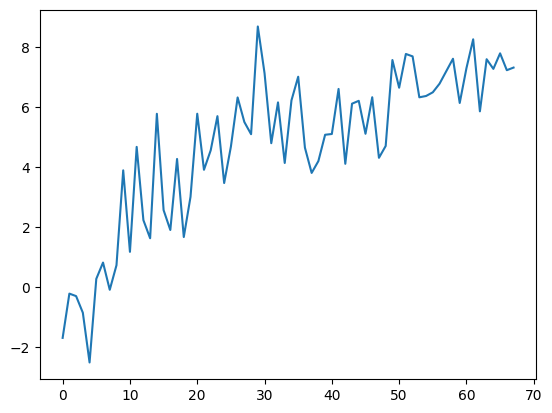

In [144]:
plt.plot(agent._episode_rewards)

<Axes: >

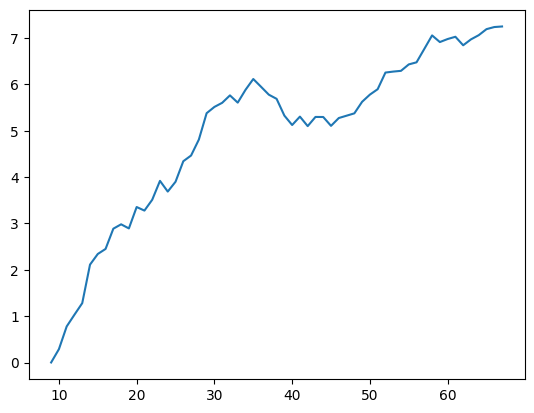

In [145]:
pd.Series(agent._episode_rewards).rolling(window=10).mean().plot()

In [146]:
df_target_train[TARGET].abs().sum()

96.25892909672194

### exp2

In [274]:
df_rewards_ts_test = pd.DataFrame(
    data={
        'do_nothing': np.zeros(len(df_target_test)),
        'buy': df_target_test[TARGET],
        'sell': -df_target_test[TARGET]
    },
    index=df_feat_test.index
)


def on_episode_end(env, done_reward):
    agent._act_net.eval()
    rewards = []
    action_cnts = {0: 0, 1: 0, 2: 0}
    actions_list = []
    for idx in df_feat_test.index.unique():
        state = df_feat_test.loc[idx].to_numpy()
        state_v = torch.FloatTensor(state).to(agent._device)
        prob_v = agent._act_net(state_v)
        actions = prob_v.argmax(dim=-1).cpu().numpy()
        action = int(pd.Series(actions).value_counts().index[0])
        reward_std = df_rewards_ts_test.iloc[:, action].loc[idx].std()
        assert reward_std < 1e-10, (reward_std, df_rewards_ts_test.loc[idx].iloc[:, action])
        reward = df_rewards_ts_test.iloc[:, action].loc[idx].mean()
        rewards.append(reward)
        action_cnts[action] += 1
        actions_list.append(actions.tolist())
    total_reward = sum(rewards)
    agent._episode_test_rewards.append(rewards)
    print(f'episode {agent._episode} : test reward = {total_reward}, n_actions = {action_cnts}, actions_list = {actions_list}')
    agent._act_net.train()

In [275]:
df_rewards_ts_train = pd.DataFrame(
    data={
        'do_nothing': np.zeros(len(df_target_train)),
        'buy': df_target_train[TARGET],
        'sell': -df_target_train[TARGET]
    },
    index=df_feat_train.index
)

In [276]:
env = MarketEnvMultiState(
    action_space=ActionSpace(actions=ACTIONS),
    df_states_ts=df_feat_train,
    df_rewards_ts=df_rewards_ts_train,
    state_seq_len=1,
    on_episode_end=on_episode_end,
)

In [277]:
state, reward = env.reset()

In [278]:
state

,openai_emb_0,openai_emb_1,openai_emb_2,openai_emb_3,openai_emb_4,openai_emb_5,openai_emb_6,openai_emb_7,openai_emb_8,openai_emb_9,...,openai_emb_1526,openai_emb_1527,openai_emb_1528,openai_emb_1529,openai_emb_1530,openai_emb_1531,openai_emb_1532,openai_emb_1533,openai_emb_1534,openai_emb_1535
2020-04-23 00:30:00+00:00,-0.016345,0.000372,-0.010876,-0.01751,0.019516,0.00237,-0.014461,-0.010375,-0.009534,0.000958,...,0.00822,-0.007861,0.032662,-0.03044,-0.037894,-0.002631,-0.023257,-0.009385,-0.005845,-0.006017


In [279]:
reward

,do_nothing,buy,sell
2020-04-23 00:30:00+00:00,0.0,0.053175,-0.053175


In [280]:
device = 'cpu'

In [281]:
OBS_DIM = state.shape[-1]

In [282]:
OBS_DIM

1536

In [283]:
len(FEAT_COLS)

1536

In [284]:
act_net = ModelActor(OBS_DIM, N_ACTIONS, hidden_size=256).to(device)
crt_net = ModelCritic(OBS_DIM, hidden_size=256).to(device)

In [285]:
exp_buffer = ExpBuffer(
    # max_size=20000,
    max_size=2500,
    prob_alpha=0.6,
    beta_start=0.4,
    beta_frames=30000, #100000,
    n_step=1,
    gamma=0.99,
)

In [286]:
agent = Agent(
    env=env,
    exp_buffer=exp_buffer,
    crt_net=crt_net,
    act_net=act_net,
    epsilon_start=0.6,
    epsilon_final=0.002,
    epsilon_decay_last_step=100000, #200000,
    # tgt_sync_steps=1000,
    # act_learning_rate=1e-5,
    # crt_learning_rate=1e-4,
    act_learning_rate=1e-6,
    crt_learning_rate=1e-5,
    device=device,
    trajectory_size=2049,
    ppo_eps=0.2,
    gae_lambda=0.95,
)

In [287]:
agent.initial_exploration(n_steps=100)

In [288]:
states, actions, rewards, dones, next_states = zip(*agent._exp_buffer._buf)

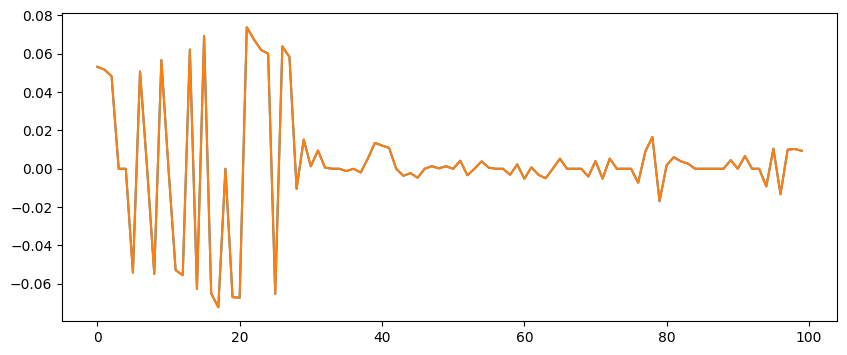

In [289]:
plt.figure(figsize=(10, 4))
plt.plot(rewards[:200])
plt.plot(agent._exp_buffer._total_discounted_rewards[:200])

In [248]:
episode = 0

while True:
    agent.train(ppo_epoch=4, batch_size=16)

episode 0 : test reward = 10.285182622284061, n_actions = {0: 0, 1: 1365, 2: 0}, actions_list = [[1, 1], 1, [1, 1], 1, [1, 1], [1, 1, 1], 1, [1, 1], [1, 1], 1, [1, 1, 1], [1, 1], [1, 1], 1, 1, [1, 1], 1, 1, [1, 1], 1, 1, 1, 1, 1, 1, [1, 1, 1, 1, 1], 1, 1, 1, 1, 1, [1, 1], [1, 1], 1, 1, 1, [1, 1, 1], 1, 1, 1, [1, 1], 1, [1, 1], 1, [1, 1], 1, 1, 1, 1, 1, [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1], 1, 1, 1, [1, 1], [1, 1], 1, 1, 1, [1, 1, 1], 1, 1, 1, 1, [1, 1], [1, 1], [1, 1, 1], 1, 1, 1, 1, 1, 1, 1, 1, [1, 1, 1], [1, 1], 1, 1, 1, [1, 1], [1, 1], 1, 1, 1, 1, [1, 1], [1, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 1], 1, [1, 1, 1, 1], [1, 1], 1, 1, 1, 1, [1, 1], [1, 1], [1, 1], [1, 1], [1, 1, 1], [1, 1], 1, 1, [1, 1, 1], 1, [1, 1], 1, 1, [1, 1, 1], [1, 1], 1, [1, 1], 1, 1, 1, 1, 1, 1, 1, [1, 1, 1, 1, 1], [1, 1], 1, [1, 1, 1], 1, 1, 1, 1, [1, 1], [1, 1, 1], [1, 1], 1, 1, 1, [1, 1, 1, 1], [1, 1], 1, 1, 1, 1, [1, 1], 1, 1, 1, 1, 1, 1, [1, 1], 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

KeyboardInterrupt: ignored

In [290]:
episode = 0

while True:
    agent.train(ppo_epoch=4, batch_size=16)

episode 0 : test reward = 0.0, n_actions = {0: 1365, 1: 0, 2: 0}, actions_list = [[0, 0], 0, [0, 0], 0, [0, 0], [0, 0, 0], 0, [0, 0], [0, 0], 0, [0, 0, 0], [0, 0], [0, 0], 0, 0, [0, 0], 0, 0, [0, 0], 0, 0, 0, 0, 0, 0, [0, 0, 0, 0, 0], 0, 0, 0, 0, 0, [0, 0], [0, 0], 0, 0, 0, [0, 0, 0], 0, 0, 0, [0, 0], 0, [0, 0], 0, [0, 0], 0, 0, 0, 0, 0, [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0], 0, 0, 0, [0, 0], [0, 0], 0, 0, 0, [0, 0, 0], 0, 0, 0, 0, [0, 0], [0, 0], [0, 0, 0], 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 0], [0, 0], 0, 0, 0, [0, 0], [0, 0], 0, 0, 0, 0, [0, 0], [0, 0], [0, 0, 0, 0], [0, 0], [0, 0, 0, 0], [0, 0], 0, [0, 0, 0, 0], [0, 0], 0, 0, 0, 0, [0, 0], [0, 0], [0, 0], [0, 0], [0, 0, 0], [0, 0], 0, 0, [0, 0, 0], 0, [0, 0], 0, 0, [0, 0, 0], [0, 0], 0, [0, 0], 0, 0, 0, 0, 0, 0, 0, [0, 0, 0, 0, 0], [0, 0], 0, [0, 0, 0], 0, 0, 0, 0, [0, 0], [0, 0, 0], [0, 0], 0, 0, 0, [0, 0, 0, 0], [0, 0], 0, 0, 0, 0, [0, 0], 0, 0, 0, 0, 0, 0, [0, 0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

KeyboardInterrupt: ignored

In [250]:
agent._act_net.eval()

for idx in df_feat_train.index.unique()[:100]:
    state = df_feat_train.loc[idx].to_numpy()
    state_v = torch.FloatTensor(state).to(agent._device)
    prob_v = agent._act_net(state_v)
    print(prob_v)
    actions = prob_v.argmax(dim=-1).cpu().numpy()
    action = int(pd.Series(actions).value_counts().index[0])

tensor([0.1261, 0.8261, 0.0479], grad_fn=<SoftmaxBackward0>)
tensor([0.1254, 0.8272, 0.0473], grad_fn=<SoftmaxBackward0>)
tensor([[0.1321, 0.8165, 0.0514],
        [0.1304, 0.8187, 0.0509]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1305, 0.8190, 0.0505],
        [0.1227, 0.8312, 0.0462],
        [0.1208, 0.8347, 0.0445],
        [0.1353, 0.8104, 0.0543]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1323, 0.8154, 0.0523],
        [0.1381, 0.8050, 0.0569]], grad_fn=<SoftmaxBackward0>)
tensor([0.1309, 0.8171, 0.0520], grad_fn=<SoftmaxBackward0>)
tensor([[0.1410, 0.8005, 0.0584],
        [0.1276, 0.8235, 0.0489]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1241, 0.8293, 0.0466],
        [0.1332, 0.8147, 0.0521],
        [0.1250, 0.8281, 0.0469]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1329, 0.8147, 0.0524],
        [0.1307, 0.8181, 0.0512],
        [0.1378, 0.8059, 0.0563]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1305, 0.8198, 0.0497],
        [0.1400, 0.8038, 0.0563]], grad_fn=<SoftmaxBackward0>)
te

In [251]:
agent._act_net.eval()

for idx in df_feat_test.index.unique()[:100]:
    state = df_feat_test.loc[idx].to_numpy()
    state_v = torch.FloatTensor(state).to(agent._device)
    prob_v = agent._act_net(state_v)
    print(prob_v)
    actions = prob_v.argmax(dim=-1).cpu().numpy()
    action = int(pd.Series(actions).value_counts().index[0])

tensor([[0.1295, 0.8201, 0.0504],
        [0.1361, 0.8090, 0.0549]], grad_fn=<SoftmaxBackward0>)
tensor([0.1317, 0.8168, 0.0515], grad_fn=<SoftmaxBackward0>)
tensor([[0.1354, 0.8109, 0.0537],
        [0.1324, 0.8167, 0.0509]], grad_fn=<SoftmaxBackward0>)
tensor([0.1321, 0.8161, 0.0517], grad_fn=<SoftmaxBackward0>)
tensor([[0.1312, 0.8174, 0.0514],
        [0.1355, 0.8119, 0.0526]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1325, 0.8168, 0.0507],
        [0.1332, 0.8156, 0.0511],
        [0.1333, 0.8131, 0.0536]], grad_fn=<SoftmaxBackward0>)
tensor([0.1320, 0.8160, 0.0521], grad_fn=<SoftmaxBackward0>)
tensor([[0.1354, 0.8096, 0.0550],
        [0.1263, 0.8255, 0.0482]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1329, 0.8142, 0.0529],
        [0.1332, 0.8140, 0.0528]], grad_fn=<SoftmaxBackward0>)
tensor([0.1256, 0.8276, 0.0468], grad_fn=<SoftmaxBackward0>)
tensor([[0.1393, 0.8036, 0.0571],
        [0.1322, 0.8158, 0.0520],
        [0.1261, 0.8269, 0.0469]], grad_fn=<SoftmaxBackward0>)
tensor([[

<Axes: ylabel='Frequency'>

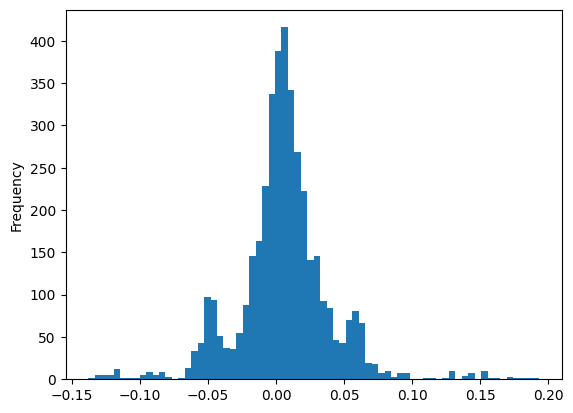

In [256]:
df_rewards_ts_train.iloc[:, 1].plot.hist(bins=70)

<Axes: ylabel='Frequency'>

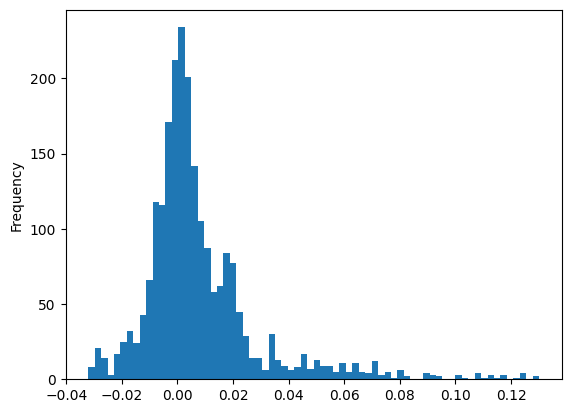

In [252]:
df_rewards_ts_test.iloc[:, 1].plot.hist(bins=70)

<Axes: ylabel='Frequency'>

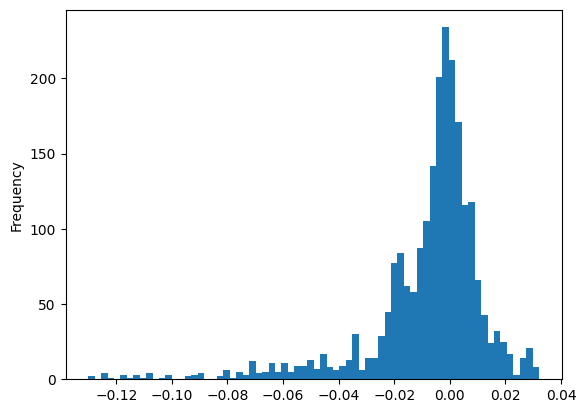

In [253]:
df_rewards_ts_test.iloc[:, 2].plot.hist(bins=70)

### exp3

In [72]:
df_rewards_ts_test = pd.DataFrame(
    data={
        'do_nothing': np.zeros(len(df_target_test)),
        'buy': df_target_test[TARGET],
        'sell': -df_target_test[TARGET]
    },
    index=df_feat_test.index
)


def on_episode_end(env, done_reward):
    agent._act_net.eval()
    rewards = []
    action_cnts = {0: 0, 1: 0, 2: 0}
    actions_list = []
    for idx in df_feat_test.index.unique():
        state = df_feat_test.loc[idx].to_numpy()
        state_v = torch.FloatTensor(state).to(agent._device)
        prob_v = agent._act_net(state_v)
        actions = prob_v.argmax(dim=-1).cpu().numpy()
        action = int(pd.Series(actions).value_counts().index[0])
        reward_std = df_rewards_ts_test.iloc[:, action].loc[idx].std()
        assert reward_std < 1e-10, (reward_std, df_rewards_ts_test.loc[idx].iloc[:, action])
        reward = df_rewards_ts_test.iloc[:, action].loc[idx].mean()
        rewards.append(reward)
        action_cnts[action] += 1
        actions_list.append(actions.tolist())
    total_reward = sum(rewards)
    agent._episode_test_rewards.append(rewards)
    print(f'episode {agent._episode} : test reward = {total_reward}, n_actions = {action_cnts}, actions_list = {actions_list}')
    agent._act_net.train()

In [73]:
df_rewards_ts_train = pd.DataFrame(
    data={
        'do_nothing': np.zeros(len(df_target_train)),
        'buy': df_target_train[TARGET],
        'sell': -df_target_train[TARGET]
    },
    index=df_feat_train.index
)

In [74]:
env = MarketEnvMultiState(
    action_space=ActionSpace(actions=ACTIONS),
    df_states_ts=df_feat_train,
    df_rewards_ts=df_rewards_ts_train,
    state_seq_len=1,
    on_episode_end=on_episode_end,
)

In [75]:
state, reward = env.reset()

In [76]:
state

,openai_emb_0,openai_emb_1,openai_emb_2,openai_emb_3,openai_emb_4,openai_emb_5,openai_emb_6,openai_emb_7,openai_emb_8,openai_emb_9,...,openai_emb_1526,openai_emb_1527,openai_emb_1528,openai_emb_1529,openai_emb_1530,openai_emb_1531,openai_emb_1532,openai_emb_1533,openai_emb_1534,openai_emb_1535
2020-04-23 00:30:00+00:00,-0.360865,0.27319,-1.446289,-0.021126,2.064689,-0.326737,0.185216,0.027073,-0.328493,1.87532,...,0.349537,-0.942163,0.419951,-0.147331,-1.763222,-0.839799,-1.396695,0.086739,-0.194347,0.48501


In [77]:
reward

,do_nothing,buy,sell
2020-04-23 00:30:00+00:00,0.0,0.053175,-0.053175


In [78]:
device = 'cpu'

In [79]:
OBS_DIM = state.shape[-1]

In [80]:
OBS_DIM

1536

In [81]:
len(FEAT_COLS)

1536

In [82]:
act_net = ModelActor(OBS_DIM, N_ACTIONS, hidden_size=256, bias=False).to(device)
crt_net = ModelCritic(OBS_DIM, hidden_size=256).to(device)

In [83]:
exp_buffer = ExpBuffer(
    # max_size=20000,
    max_size=2500,
    prob_alpha=0.6,
    beta_start=0.4,
    beta_frames=30000, #100000,
    n_step=1,
    gamma=0.99,
)

In [84]:
agent = Agent(
    env=env,
    exp_buffer=exp_buffer,
    crt_net=crt_net,
    act_net=act_net,
    epsilon_start=0.6,
    epsilon_final=0.002,
    epsilon_decay_last_step=100000, #200000,
    # tgt_sync_steps=1000,
    # act_learning_rate=1e-5,
    # crt_learning_rate=1e-4,
    act_learning_rate=1e-6,
    crt_learning_rate=1e-5,
    device=device,
    trajectory_size=2049,
    ppo_eps=0.2,
    gae_lambda=0.95,
)

In [85]:
agent.initial_exploration(n_steps=100)

In [86]:
states, actions, rewards, dones, next_states = zip(*agent._exp_buffer._buf)

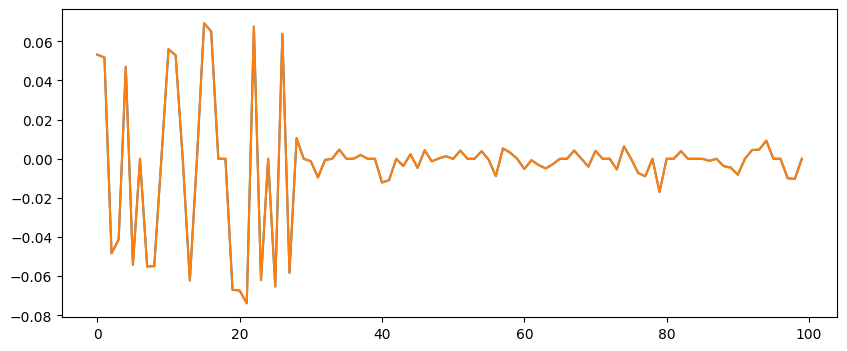

In [87]:
plt.figure(figsize=(10, 4))
plt.plot(rewards[:200])
plt.plot(agent._exp_buffer._total_discounted_rewards[:200])

In [88]:
episode = 0

while True:
    agent.train(ppo_epoch=4, batch_size=16)

episode 0 : test reward = -0.9715126745654377, n_actions = {0: 389, 1: 428, 2: 548}, actions_list = [[2, 0], 1, [2, 0], 0, [2, 2], [1, 0, 1], 1, [1, 2], [2, 0], 0, [0, 0, 2], [0, 2], [2, 0], 2, 2, [1, 2], 2, 1, [0, 2], 1, 0, 1, 2, 1, 1, [0, 0, 2, 1, 2], 1, 0, 1, 0, 2, [0, 0], [1, 1], 2, 0, 1, [2, 1, 1], 1, 2, 1, [2, 1], 2, [1, 1], 1, [1, 1], 2, 0, 1, 0, 2, [0, 0, 0, 0], [0, 2, 2, 1], [2, 0, 0], [2, 1], 0, 2, 2, [2, 2], [2, 1], 0, 2, 2, [2, 1, 1], 2, 0, 0, 2, [2, 1], [0, 1], [1, 2, 1], 0, 2, 1, 1, 0, 0, 1, 2, [2, 1, 1], [1, 1], 2, 2, 1, [1, 1], [1, 1], 2, 0, 1, 2, [1, 0], [1, 0], [0, 2, 2, 1], [0, 2], [2, 2, 2, 0], [2, 2], 1, [2, 2, 0, 1], [2, 2], 2, 1, 2, 1, [2, 2], [2, 2], [2, 2], [1, 2], [1, 1, 2], [2, 1], 1, 0, [2, 1, 1], 2, [1, 2], 1, 2, [2, 1, 2], [0, 1], 1, [1, 1], 1, 2, 1, 2, 1, 0, 2, [0, 2, 1, 2, 1], [1, 1], 1, [1, 2, 0], 0, 1, 2, 1, [1, 1], [1, 2, 2], [0, 0], 2, 0, 1, [1, 1, 1, 1], [0, 0], 0, 1, 2, 2, [2, 2], 2, 2, 1, 1, 2, 2, [2, 1], 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 

KeyboardInterrupt: ignored

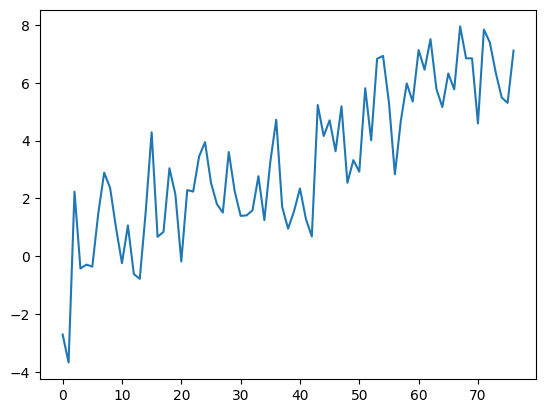

In [91]:
plt.plot(agent._episode_rewards)

<Axes: >

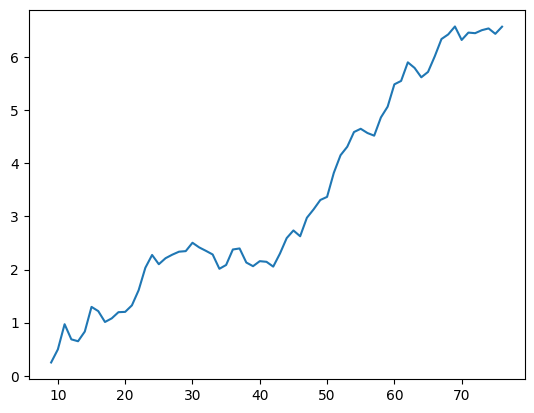

In [92]:
pd.Series(agent._episode_rewards).rolling(window=10).mean().plot()

In [98]:
import matplotlib.cm as cm

In [101]:
cm.Blues(0.2)

(0.8141176470588235, 0.883921568627451, 0.9498039215686275, 1.0)

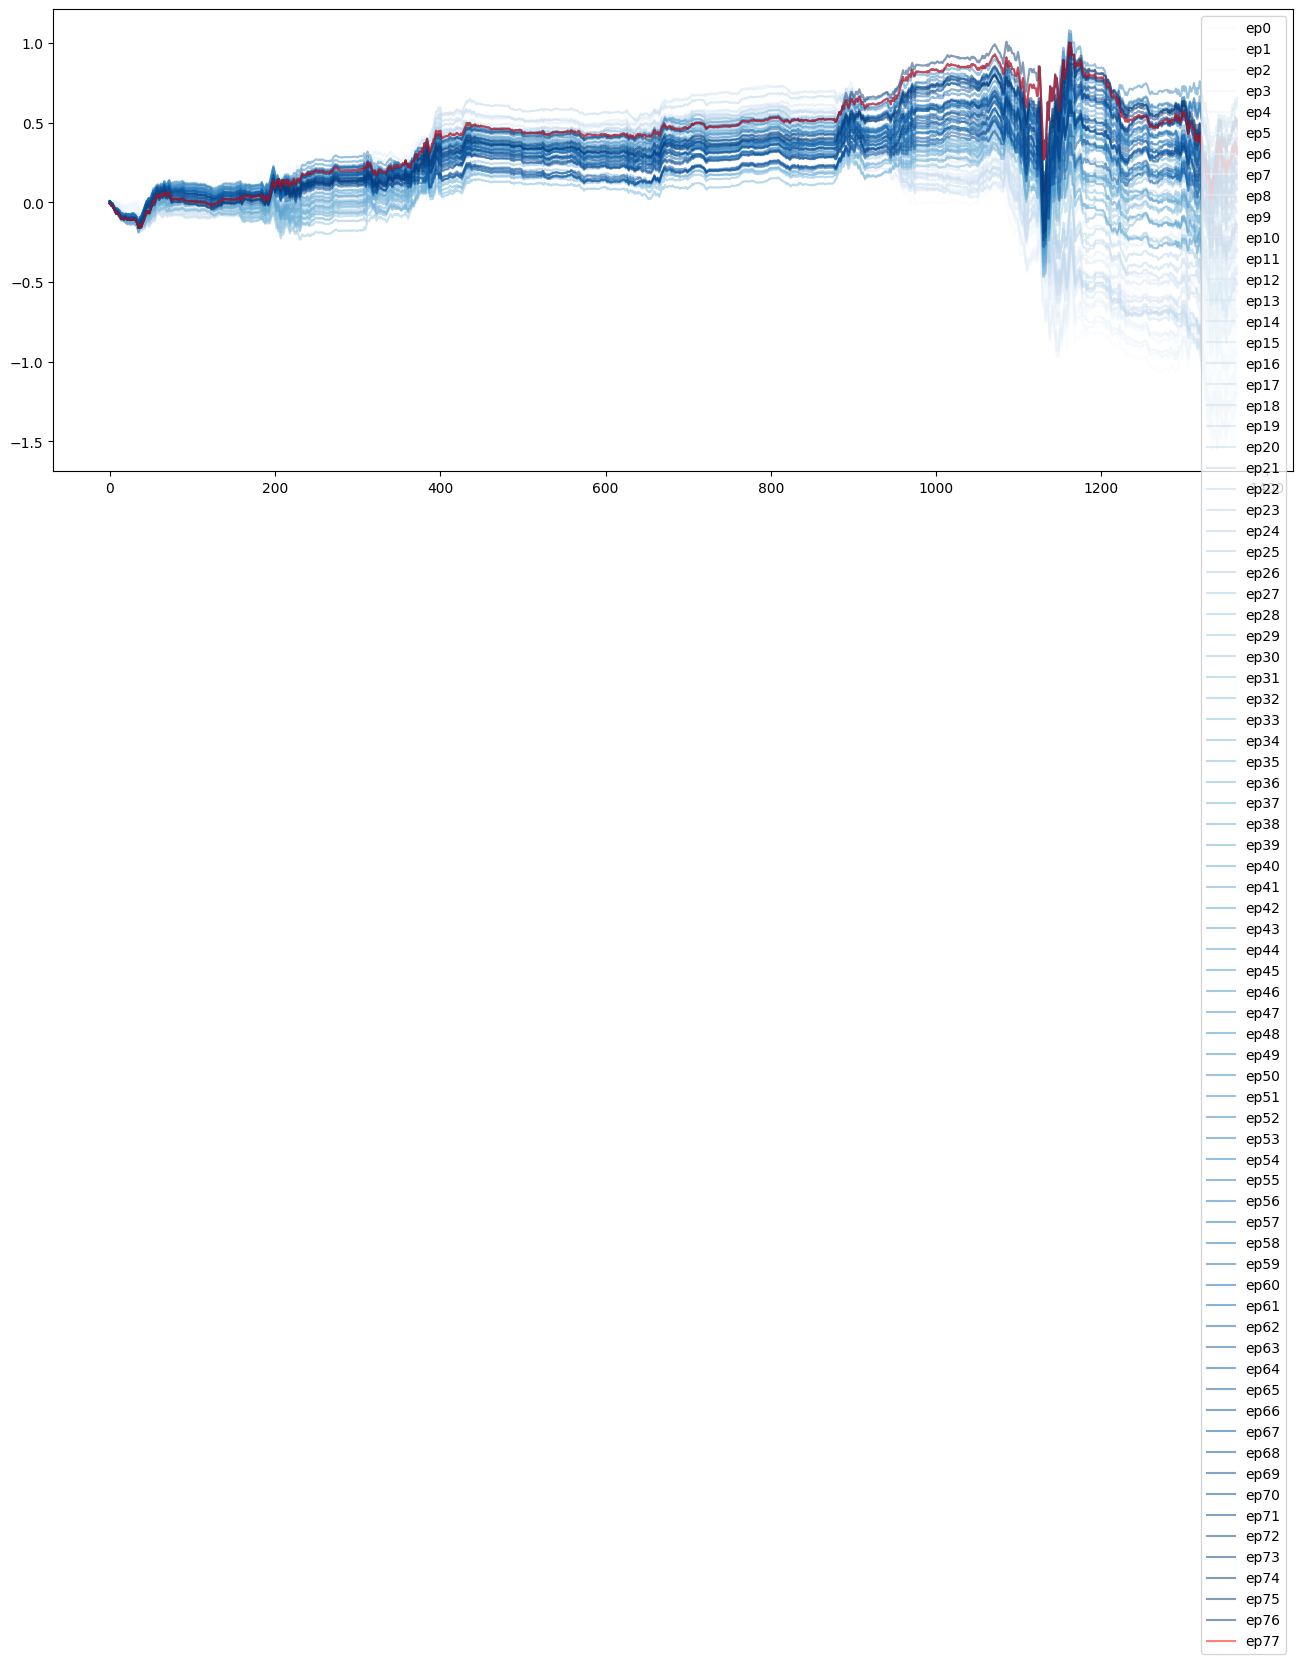

In [106]:
plt.figure(figsize=(16, 6))
for i, test_rewards in enumerate(agent._episode_test_rewards):
    plt.plot(pd.Series(test_rewards).cumsum(), label=f'ep{i}', alpha=0.5, color=cm.Blues(i/len(agent._episode_test_rewards)))
plt.plot(pd.Series(agent._episode_test_rewards[-1]).cumsum(), label=f'ep{len(agent._episode_test_rewards)}', alpha=0.5, color='red')
plt.legend()

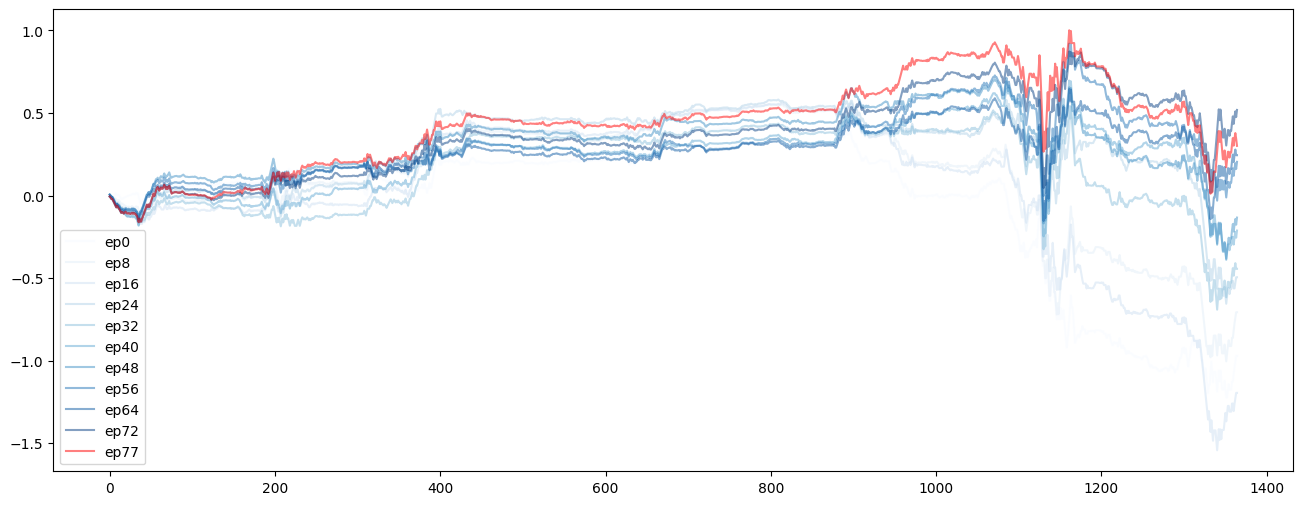

In [105]:
plt.figure(figsize=(16, 6))
for i, test_rewards in enumerate(agent._episode_test_rewards[::8]):
    plt.plot(pd.Series(test_rewards).cumsum(), label=f'ep{8*i}', alpha=0.5, color=cm.Blues(8*i/len(agent._episode_test_rewards)))
plt.plot(pd.Series(agent._episode_test_rewards[-1]).cumsum(), label=f'ep{len(agent._episode_test_rewards)}', alpha=0.5, color='red')
plt.legend()

In [89]:
agent._act_net.eval()

for idx in df_feat_train.index.unique()[:100]:
    state = df_feat_train.loc[idx].to_numpy()
    state_v = torch.FloatTensor(state).to(agent._device)
    prob_v = agent._act_net(state_v)
    print(prob_v)
    actions = prob_v.argmax(dim=-1).cpu().numpy()
    action = int(pd.Series(actions).value_counts().index[0])

tensor([0.3830, 0.3188, 0.2982], grad_fn=<SoftmaxBackward0>)
tensor([0.4028, 0.3503, 0.2469], grad_fn=<SoftmaxBackward0>)
tensor([[0.3732, 0.3167, 0.3101],
        [0.2783, 0.4218, 0.2999]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3406, 0.3613, 0.2981],
        [0.3347, 0.5295, 0.1358],
        [0.3348, 0.4593, 0.2059],
        [0.3324, 0.4722, 0.1954]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2698, 0.2107, 0.5195],
        [0.2925, 0.5087, 0.1988]], grad_fn=<SoftmaxBackward0>)
tensor([0.3294, 0.3103, 0.3603], grad_fn=<SoftmaxBackward0>)
tensor([[0.4203, 0.4181, 0.1615],
        [0.4043, 0.1967, 0.3991]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2699, 0.5763, 0.1538],
        [0.2192, 0.5213, 0.2595],
        [0.3857, 0.3916, 0.2227]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2668, 0.1946, 0.5386],
        [0.3649, 0.2760, 0.3590],
        [0.2501, 0.1616, 0.5883]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3004, 0.2903, 0.4093],
        [0.4089, 0.1547, 0.4364]], grad_fn=<SoftmaxBackward0>)
te

In [90]:
agent._act_net.eval()

for idx in df_feat_test.index.unique()[:100]:
    state = df_feat_test.loc[idx].to_numpy()
    state_v = torch.FloatTensor(state).to(agent._device)
    prob_v = agent._act_net(state_v)
    print(prob_v)
    actions = prob_v.argmax(dim=-1).cpu().numpy()
    action = int(pd.Series(actions).value_counts().index[0])

tensor([[0.2207, 0.3842, 0.3951],
        [0.3372, 0.1528, 0.5100]], grad_fn=<SoftmaxBackward0>)
tensor([0.2062, 0.1715, 0.6224], grad_fn=<SoftmaxBackward0>)
tensor([[0.2293, 0.1689, 0.6018],
        [0.3830, 0.2764, 0.3405]], grad_fn=<SoftmaxBackward0>)
tensor([0.4128, 0.3234, 0.2637], grad_fn=<SoftmaxBackward0>)
tensor([[0.3247, 0.1636, 0.5117],
        [0.2250, 0.1290, 0.6460]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3255, 0.1724, 0.5020],
        [0.3328, 0.1663, 0.5010],
        [0.2520, 0.6609, 0.0871]], grad_fn=<SoftmaxBackward0>)
tensor([0.3186, 0.1773, 0.5040], grad_fn=<SoftmaxBackward0>)
tensor([[0.3206, 0.2690, 0.4104],
        [0.3319, 0.2537, 0.4144]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1690, 0.0401, 0.7908],
        [0.3559, 0.3360, 0.3081]], grad_fn=<SoftmaxBackward0>)
tensor([0.3944, 0.4116, 0.1941], grad_fn=<SoftmaxBackward0>)
tensor([[0.3418, 0.3966, 0.2615],
        [0.3315, 0.1564, 0.5121],
        [0.3575, 0.2733, 0.3691]], grad_fn=<SoftmaxBackward0>)
tensor([[